# computing msd of a single levy particle trial
Tim Tyree<br>
5.30.2023

In [1]:
from lib.my_initialization import *
from lib.utils.pbc import *
import random,scipy
import shutil
%load_ext autoreload
%autoreload 2

/Users/timothytyree/opt/miniconda3/envs/pyenv/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
#reset matplotlib settings
from mpltools import annotation
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()

In [3]:
seed=42
np.random.seed(seed)

# #get distance metric
# distance_L2_pbc=get_distance_L2_pbc(width=1,height=1)

# define module

# TODO: compute msd for a single particle trial using trackpy's msd function

In [4]:
alpha=1
alpha=2
# alpha=1.5

#TODO: compute single-particle MSD for various alpha and plot

#TODO: dev measurement function of rates

#FK
data_dir =f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/levy_test/Log/pbc_seed_123456789_fc_2_r_0.7_D_0.115_L_5_kappa_100000.0_varkappa_1.552_alpha_{alpha}_log.csv'
# #LR
data_dir =f'/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/levy_test/Log/pbc_seed_123456789_fc_2_r_0.5_D_0.42_L_5_kappa_100000.0_varkappa_9.3_alpha_{alpha}_log.csv'
#control LR (a=0, alpha=2)
data_dir= '/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/levy_test/Log/pbc_seed_123456789_fc_2_r_0.5_D_0.42_L_5_kappa_100000.0_varkappa_0_alpha_2.0_log.csv'

In [5]:
df=pd.read_csv(data_dir)
df.head(5)

,frame,t,n,x,y,particle
0,1,0.00001,16,0.496118,0.499188,0
1,1,0.00001,16,1.829908,0.499794,1
2,1,0.00001,16,3.166520,0.503337,2
3,1,0.00001,16,4.505489,0.495091,3
4,1,0.00001,16,0.498270,1.830161,4


In [6]:
fps=1e-3/df['t'].drop_duplicates().diff().values[1] #kHz
# fps=1/df['t'].drop_duplicates().diff().values[1] #kHz
# fps=1e5 #Hz
# fps=1e2 #Hz
# fps=1

In [7]:
df['t'].drop_duplicates().max()

0.48493

In [8]:
import trackpy

In [20]:
Deff = 0.42*2 + 9.3
Deff = 0.42*2
# Deff = 0.115*2 + 1.552
# Deff = 0.115*2
Deff/=2

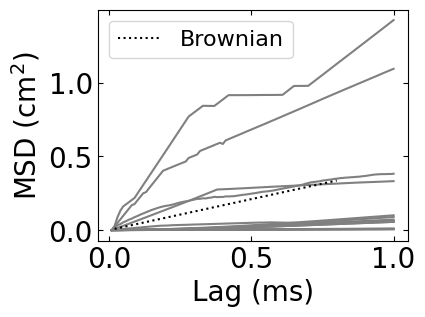

In [10]:
min_num_obs=10
min_num_time_points=50
figsize=4,3
fig,ax=plt.subplots(figsize=figsize)
for pid,g in df.groupby(by='particle'):
    g_msd = trackpy.msd(g,detail=True,mpp=1,fps=fps)
    g_msd['msd']=g_msd['msd'] - g_msd['msd'].values[0] #subtract the first point
    g_msd = g_msd[g_msd['N']>=min_num_obs]#drop points with too few data
    if g_msd.shape[0]>min_num_time_points:
        g_msd.plot(x='lagt',y='msd',ax=ax,color='gray',label='_')
        
#TODO: plot a powerlaw with exponent of alpha
x1 = 2e-2; x2 = 8e-1;
M=Deff; nu=1; label='Brownian'
# M=Deff; nu=2/1.5; label='Lévy'
# M=Deff; nu=1/2; label='Lévy'
# ax.plot([x1,x2],[M*x1**(nu),M*x2**(nu)],'k:',label=label)
xv=np.linspace(x1,x2,100)
ax.plot(xv,M*xv**nu,'k:',label=label)
ax.legend(fontsize=16)
format_plot(ax=ax,xlabel='Lag (ms)',ylabel=r'MSD (cm$^2$)',fontsize=20)#,use_loglog=True)
# plt.legend(None)
ax.tick_params(top=True, right=True,direction='in',which='both')
# ax.set_xlim([0,10])
# ax.set_ylim([0,1])
plt.show()

# measure the classical MSD

In [11]:

#TODO: measure the classical MSD simply averaged over particles
#TODO: measure the classical ensemble-averaged MSD simply averaged over particles

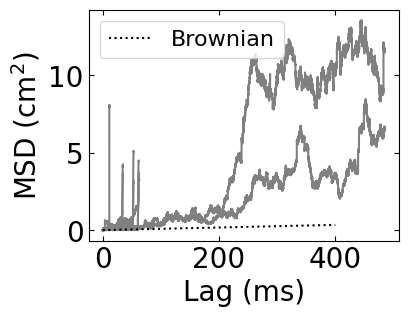

In [25]:
L=5
min_num_obs=10
min_num_time_points=50
figsize=4,3
fig,ax=plt.subplots(figsize=figsize)
 
for pid,g in df.groupby(by='particle'):
    traj = unwrap_traj_and_center(g,width=L,height=L)
    lagt=(traj['t']-traj['t'].values[0])*1e3
    x=traj['x']-traj['x'].values[0]
    y=traj['y']-traj['y'].values[0]
    msd = x**2 + y**2
    if min_num_time_points<lagt.shape[0]:
        plt.plot(lagt,msd,color='gray')

#TODO: plot a powerlaw with exponent of alpha
x1 = 2e-2; x2 = 4e2;
M=2*Deff*1e-3; nu=1; label='Brownian'
# M=Deff; nu=2/1.5; label='Lévy'
# M=Deff; nu=1/2; label='Lévy'
# ax.plot([x1,x2],[M*x1**(nu),M*x2**(nu)],'k:',label=label)
xv=np.linspace(x1,x2,100)
ax.plot(xv,M*xv**nu,'k:',label=label)
ax.legend(fontsize=16)
format_plot(ax=ax,xlabel='Lag (ms)',ylabel=r'MSD (cm$^2$)',fontsize=20)#,use_loglog=True)
# plt.legend(None)
ax.tick_params(top=True, right=True,direction='in',which='both')
# ax.set_xlim([0,10])
# ax.set_ylim([0,1])
plt.show()

'/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/levy_test/Log/pbc_seed_123456789_fc_2_r_0.5_D_0.42_L_5_kappa_100000.0_varkappa_0_alpha_2.0_log.csv'